In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure
import matplotlib
import webcolors
from webcolors import *

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 15)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  3.062017690051863
Iteration  10 : error is  12.461348138250031
Iteration  20 : error is  11.858126148651174
Iteration  30 : error is  12.88921490920535
Iteration  40 : error is  12.996332129013096
Iteration  50 : error is  13.10282977997721
Iteration  60 : error is  12.62636932890615
Iteration  70 : error is  12.811891109166961
Iteration  80 : error is  13.424892336200635
Iteration  90 : error is  12.852908181881562
Iteration  100 : error is  12.59923034176113
Iteration  110 : error is  1.6974485442625653
Iteration  120 : error is  1.263900899660959
Iteration  130 : error is  1.003087446280095
Iteration  140 : error is  0.7936234973370302
Iteration  150 : error is  0.649873541322469
Iteration  160 : error is  0.5835495124684512
Iteration  170 : error is  0.5455521134810144
Iteration  180 : error is  0.5178695964840937
Iteration  190 : error is  0.506171

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

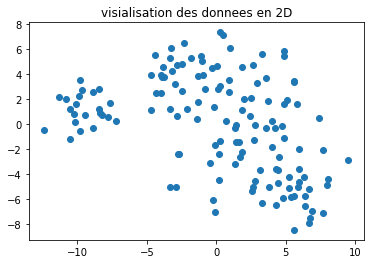

In [3]:
#construction du graphe pour visualiser les données 2D
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')
plt.title("visialisation des donnees en 2D")
plt.savefig('../Data/Graphes/visialisation_des_donne_en_2D.png',dpi=200)
plt.show()

In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer et choix du clustering qui fait le plus de sens------#

#on choisi k=5 clustering
k=4

cluster_classe = {} # vas stocker les ID de claque cluster avec la liste des pays appartenant a chaque cluster
for i in range(0,k):
    cluster_classe[i] = []

kmeans = KMeans(n_jobs = -1, n_clusters = k, init='k-means++')
kmeans.fit(data_2D)

#pour chaque cluster, je stocke la liste des pays associé
for i in range(0, len(kmeans.labels_) ):
    cp_liste=[]
    key=kmeans.labels_[i]
    cp_liste = cluster_classe[key]
    cp_liste.append(country_names[i])
    cluster_classe[key] = cp_liste

print("\n","#"*32,"Nombre de cluster= ", k, "#"*33, "\n|"," "*85,"|")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

li = 109
with open('../Data/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'w') as fichier:
    fichier.write(' '*8 +'Repartition des pays dans '+str(k)+' cluster \n\n+'+"-"*li +"+\n")
    fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
        

#on affiche les centroïdes de chaque cluster + le code de couleur associer
for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
        
    colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], k) )
    color_RGB= hex_to_rgb (colore_hex)
    
    #'get_colour_name' donne une approximation du nom de couleur la plus proche de celle sur l'image
    actual_name, colore_name = get_colour_name(color_RGB)
    
    with open('../Data/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'a') as fichier:
        fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        
    print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    


 ################################ Nombre de cluster=  4 ################################# 
|                                                                                       |
|                  Thailand -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Senegal -> centroïdes associer au Cluter N*: 2 color=( dodgerblue)  |
|                     Chile -> centroïdes associer au Cluter N*: 3 color=( lightgreen)  |
|                   Austria -> centroïdes associer au Cluter N*: 4 color=( darkorange)  |


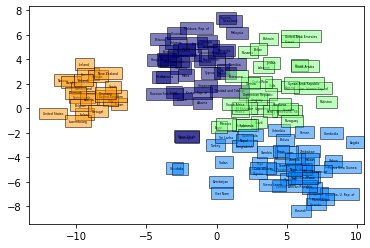

In [5]:
#----task_1.2 : graphe réduit pour visualiser sur l'écran d'ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)
plt.savefig('../Data/Graphes/visialisation_des_donne_pour_k_fixer_a_4.png',dpi=200)


 ################################## __pour k =  2 __ #################################### 
|                                                                                       |
|                  Colombia -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                    Poland -> centroïdes associer au Cluter N*: 2 color=( lightgreen)  |

 ################################## __pour k =  3 __ #################################### 
|                                                                                       |
|                 Mauritius -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Austria -> centroïdes associer au Cluter N*: 2 color=(deepskyblue)  |
|                     Benin -> centroïdes associer au Cluter N*: 3 color=(       gold)  |

 ################################## __pour k =  4 __ #################################### 
|                                                                                       |
|   

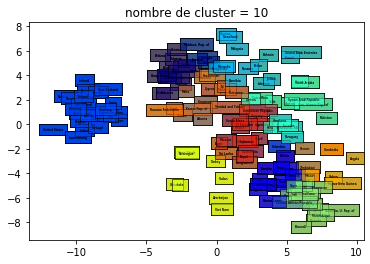

In [6]:
#-------task_2 :regrouper des données HDR avec l'algorithme k-means pour k = [2,10]. 
x,y =data_scaled.shape
precision=0.5 # elle permet de defini une plage de valeur comprise entre [value-precision ; value+precision]

SSE = []
for cluster in range(2,11):
    # vas stocker les ID de claque cluster avec la liste des noms de pays appartenant a chaque cluster
    #cluster_classe[N*_cluster][index_pays] :retourne le nom du pays appartenant a ce cluster
    cluster_classe = {}
    clusterID_pays = {}
    for i in range(0,cluster):
        cluster_classe[i] = []
        clusterID_pays[i] = []
        
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
     
    #pour chaque cluster, je stocke la liste des pays associé
    for i in range(0, len(kmeans.labels_) ):
        key=kmeans.labels_[i]
        cp_liste=[]
        cp_liste = cluster_classe[key]
        cp_liste.append(country_names[i])
        cluster_classe[key] = cp_liste
        ID_liste=[] 
        ID_liste = clusterID_pays[key] 
        ID_liste.append(i) 
        clusterID_pays[key] = ID_liste 
       
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    print("\n","#"*34,"__pour k = ", cluster,"__", "#"*36, "\n|"," "*85,"|")
    plt.savefig('../Data/Graphes/'+str(cluster)+'_Means.png',dpi=200)
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    
    li = 109
    with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'w') as fichier:
        fichier.write(' '*8 +'Tableau_1: Repartition des pays dans '+str(cluster)+' cluster \n\n+'+"-"*li +"+\n")
        fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
            
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        
        #je determine le nom de la couleur assicier a chaque cluster
        colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], cluster) )
        color_RGB= hex_to_rgb (colore_hex)
        actual_name, colore_name = get_colour_name(color_RGB)
        
        #je souvegarde la liste des pays par cluster dans un fichier .txt
        with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
            fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    
    stat = {}
    stat2 = {}
    li= 27+(19*cluster)
    #AllStat[index_caracteristique][N*_cluster] : retourne 
    #le nombre de pays dans ce cluster qui ont approximativement la meme valeur la caracteristique
    AllStat={}
    AllStat2 = {}
    for i in range(0,y):
        AllStat[i] = []
        AllStat2[i] = [[0] * 1] * cluster
        
    for i in range(0, len(clusterID_pays) ): #pour chaque cluster
        premier= clusterID_pays[i][0]
        valeur = data_scaled[premier]
        for j in range(0, y):#pour chaque caracteristique
            index =0
            index2 =[] #va contenir la liste des valeur d'une caracteristique pour tous les pays du meme cluster
            for k in range(0, len(clusterID_pays[i]) ): #pour chaque pays
                pays=clusterID_pays[i][k]
                index2.append(data_scaled[pays][j]) #### ajoute recent#####
                if (data_scaled[pays][j]>=valeur[j]-precision) and (data_scaled[pays][j]<=valeur[j]+precision):
                    index=index+1
        
            stat[j]=index
            stat2[j]=index2 
            
        for m in range(0, len(stat) ): #pour chaque ligne contenant le nombre approxi de pays
            car_liste=[]
            car_liste = AllStat[m]
            car_liste.append(stat[m])
            AllStat2[m][i]= stat2[m]

    with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
        fichier.write('\n\n'*3 +' '*8 +'Tableau_2: estimation du niveau de proximiter entre les pays en fonction des caractiristique   \n\n+'+"-"*li +"+\n")
        fichier.write("|indicator_names "+" "*11 +"| Nombre de pays/cluster ayant des valeur \n| "+" "*26 +"|  de caracteristique proche \n+" +"-"*li +"+" )
        fichier.write("\n|" +" "*27 + "| Cluster_ID" +" "*(li-39) +"| \n|" +"-"*li +"+ \n|"+" "*27)
        for i in range(0, len(clusterID_pays)):
            fichier.write("|%17s " % (i+1))
        fichier.write("|\n#" +"#"*li +"#")

        for m in range(0, len(AllStat) ):
            fichier.write("\n|%2s %23s " % (m,hdr_data['indicator_names'][m]))
            for i in range(0, cluster):
                fichier.write("|%3s [%5s;%5s] " % (AllStat[m][i], round(min(AllStat2[m][i]),2), round(max(AllStat2[m][i]),2) ))
            fichier.write("|\n+" +"-"*li +"+")

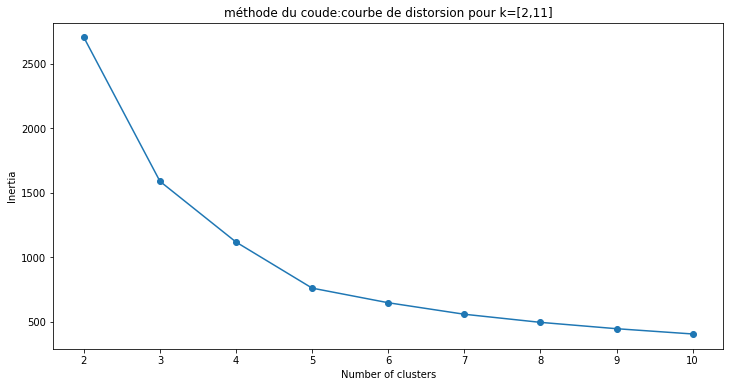

In [7]:
# affiche les résultats stocker dans la variable SSE en fonction de K
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("méthode du coude:courbe de distorsion pour k=[2,11]")
plt.savefig('../Data/Graphes/methode_du_coude_courbe_de_distorsion.png',dpi=200)

In [8]:
#Utiliser pour tester
list_pays =['Greece', 'Argentina', 'Uruguay', 'Mexico', 'Trinidad and Tobago', 'Brazil', 'Colombia', 'Venezuela, RB', 'China', 'Peru', 'Ecuador', 'Philippines', 'Paraguay', 'Dominican Republic', 'Azerbaijan', 'El Salvador', 'Indonesia', 'Viet Nam', 'Honduras', 'Guatemala', 'South Africa', 'Bangladesh', 'Nepal', 'Sudan']

caracteristique= 35

print("caracteristique :%s \n Descrip : %s \n" %(hdr_data['indicator_names'][caracteristique], hdr_data['indicator_descriptions'][caracteristique]))
for i in range(0, len(list_pays) ): 
    pos=hdr_data["country_names"].index(list_pays[i])
    print ("%23s = %6s " %(list_pays[i], round(data_scaled[pos][caracteristique],2) ) )
    
    
pays ="Austria"
for i in range(0, len(hdr_data['indicator_names']) ):
    value=[]
    for j in range(0, len(data_scaled) ): 
        value.append(data_scaled[j][i])
    pos=hdr_data["country_names"].index(pays)
    print ("%2s %23s = %6s  [%s ; %s] " %(i,hdr_data['indicator_names'][i], round(data_scaled[pos][i],2), round(min(value),2), round(max(value),2) ) )



caracteristique :Pop 2004 
 Descrip : total population 2004 (millions) 

                 Greece =  -0.22 
              Argentina =  -0.04 
                Uruguay =  -0.28 
                 Mexico =   0.42 
    Trinidad and Tobago =  -0.29 
                 Brazil =   0.95 
               Colombia =   0.01 
          Venezuela, RB =  -0.12 
                  China =   8.58 
                   Peru =  -0.11 
                Ecuador =  -0.21 
            Philippines =   0.26 
               Paraguay =  -0.26 
     Dominican Republic =  -0.24 
             Azerbaijan =  -0.24 
            El Salvador =  -0.25 
              Indonesia =    1.2 
               Viet Nam =   0.27 
               Honduras =  -0.25 
              Guatemala =  -0.22 
           South Africa =   0.02 
             Bangladesh =   0.65 
                  Nepal =  -0.12 
                  Sudan =  -0.06 
 0              Pop growth =  -1.21  [-1.8 ; 4.62] 
 1         Pop growth 2004 =  -1.07  [-2.28 ; 2.56] 
 2    